In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/willrmull/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


Text(-0.2, -0.1, 'Data: New York State Department of Environmental Conservation\nAccessed: November 8, 2025')

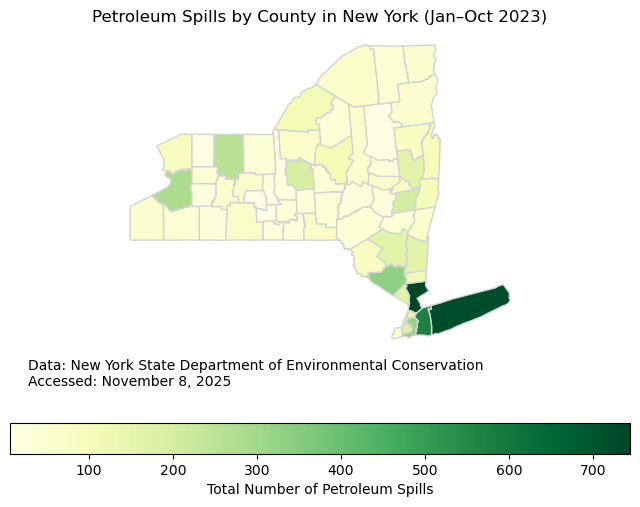

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Import data
spills = gpd.read_file(os.path.join('data', 'Spill_Incidents_20251108.csv'))
counties = gpd.read_file(os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp'))

# Fix spills column names and types
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
spills['quantity'] = pd.to_numeric(spills['quantity'], errors='coerce')
spills['recovered'] = pd.to_numeric(spills['recovered'], errors='coerce')
spills['spill_date'] = pd.to_datetime(spills['spill_date'], errors='coerce')
spills['close_date'] = pd.to_datetime(spills['close_date'], errors='coerce')

# Filter data for petrroleum and date range
petr_23 = spills[
    (spills['material_family'] == 'Petroleum') &
    (spills['spill_date'] >= '2023-01-01') &
    (spills['spill_date'] <= '2023-10-31')
]

# Get spills per county
spills_per_county = (
    petr_23['county']
    .value_counts()
    .reset_index()
    .rename(columns={'county': 'county', 'count': 'n_spills'})
)

# Clean column names
counties.columns = counties.columns.str.lower().str.replace(' ', '_')

# Get counties in New York
ny_counties = counties[counties['statefp'] == '36'][['name', 'geometry']].reset_index(drop=True)
ny_counties = ny_counties.rename(columns={'name': 'county'})

# Merging Dataframes
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')
ny_counties = pd.merge(ny_counties, spills_per_county, on='county', how='inner')

# Add one too Niagara county
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills']+=1

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_axis_off()

# Choropleth map of petroleum spills by county
ny_counties.plot(ax=ax,
                 column='n_spills', 
                 cmap='YlGn', 
                 legend=True, 
                 legend_kwds={'label': "Total Number of Petroleum Spills",
                              'orientation': "horizontal"},
                 edgecolor = "lightgrey",
                 linewidth = 1,
                 figsize=(10, 6))


ax.set_title("Petroleum Spills by County in New York (Jan–Oct 2023)") # Add Title
# Add annotation containing data source and data eof access
ax.annotate("Data: New York State Department of Environmental Conservation\nAccessed: November 8, 2025",
            xy=(-0.2, -0.1), 
            xycoords='axes fraction')

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

### Dataset One: Spilling Incidents in New York State
CSV containing a record of petrolium or other hazardous materials spills in New York State from 1978 to the present. Data includes the nominal location of each spill in addition to geometry allowing for geospatial analysis. The type of spill, volume, and amount recovered are also included in the dataset. 
    
- Link to Data: https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data
- Date of Access: November 8, 2025

### Dataset Two: TIGER 2023 Counties Shape File
Spatial data taken from the US Census Bureau containing geometry information for counties, or equivalent, across America in 2023.
    
- Link to Data: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2023&layergroup=Counties+%28and+equivalent%29
- Date of Access: November 8, 2025



## 3. Import libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

spills = gpd.read_file(os.path.join('data', 'Spill_Incidents_20251108.csv'))
counties = gpd.read_file(os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp'))

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
# Import CSV of Spill Data 
fp =  os.path.join('data', 'Spill_Incidents_20251108.csv')
spills = gpd.read_file(fp)

# Import County Shapefile
fp = os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head(5)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,...,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [6]:
#b. Check the data types of the columns
spills.dtypes

Spill Number               object
Program Facility Name      object
Street 1                   object
Street 2                   object
Locality                   object
County                     object
ZIP Code                   object
SWIS Code                  object
DEC Region                 object
Spill Date                 object
Received Date              object
Contributing Factor        object
Waterbody                  object
Source                     object
Close Date                 object
Material Name              object
Material Family            object
Quantity                   object
Units                      object
Recovered                  object
geometry                 geometry
dtype: object

In [7]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. From the data exploration I learned that the column names of the dataframe are not in a standard format and will likely need to be changed. Additionally, we can see that the classification of materials is somewhat ambigious as they do not specify which hazardous materials specifially are in the water. Lastly, we can see that the dataset does not have a consistent formatting on the regions in the dataset. Regions outside of New York State are not classified by county names but instead by state name followed by the region number.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [9]:
# Convert column names to snake case
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [10]:
# Convert quantity and recovered columns to numeric values
spills.quantity = pd.to_numeric(spills.quantity, errors='coerce')
spills.recovered = pd.to_numeric(spills.quantity, errors='coerce')

# Convert date columns to date time format
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['close_date']= pd.to_datetime(spills['close_date'])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# Select petrolium spills which occured between Jan 1st 2023, and Oct 31st 2023
petr_23 = spills[(spills['material_family'] == 'Petroleum') &
                 (spills['spill_date'] >= '2023-01-01') & 
                 (spills['spill_date'] <= '2023-10-31')]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [12]:
print(f"The dataframe has data from the year {petr_23.spill_date.dt.year.unique()} and the months {petr_23.spill_date.dt.month_name().unique()}")

The dataframe has data from the year [2023] and the months ['June' 'August' 'September' 'July' 'January' 'February' 'March' 'October'
 'May' 'April']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# Test verifying that petr_23 has only data from petrolium
assert petr_23['material_family'].str.contains('Petroleum').any(), "Not all values are petroleum"

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [14]:
# Get count of spills in each county
spills_per_county = petr_23.groupby('county')['county'].value_counts().reset_index(name = 'n_spills')

spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [15]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

In [16]:
# a Check the geo-dataframe's head
counties.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [17]:
# b Check the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [18]:
# c Check the geo-dataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

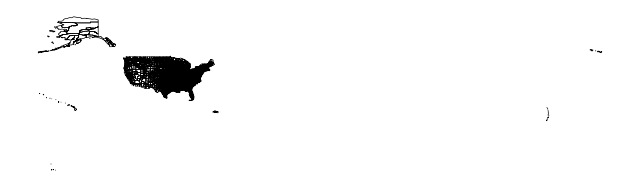

In [19]:
# d Plot the geo-dataframe
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

counties.plot(
    ax=ax,
    edgecolor='black',
    color = 'none',
    linewidth=0.5
)

The data exploration revieled that the data includes the entirety of the US including overseas territories such as the marshall islands. This means that the data will need to be filtered to only include locations data relevant to the New York dataset. There is also no state name column, meaning I will need to filter based on what NY state fp or filter based on counties. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [20]:
# Convert column names to snake case
counties.columns = counties.columns.str.lower().str.replace(' ', '_')

In [21]:
counties

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103893380,12276629,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329782924,16924046,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,0500000US28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1849790735,72085470,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48,227,01383899,48227,0500000US48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039148,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

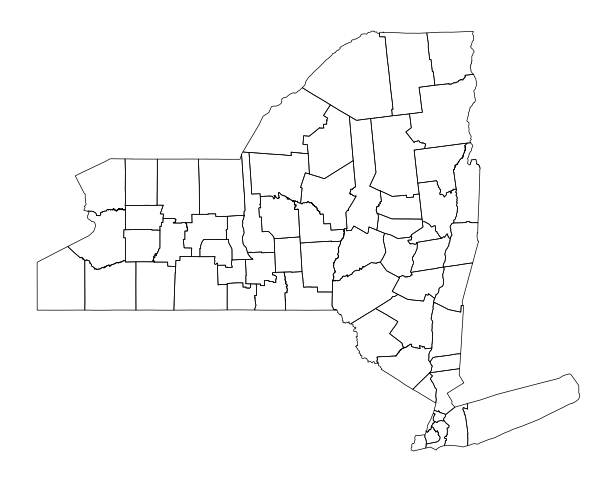

In [22]:
# Create subset of counties in New York State
ny_counties = counties.loc[counties.statefp == '36', ['name', 'geometry']].reset_index()

# Plot the counties in New York
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

ny_counties.plot(
    ax=ax,
    edgecolor='black',
    color = 'none',
    linewidth=0.5
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [23]:
print(ny_counties['name'])

0         Steuben
1        Saratoga
2        Allegany
3          Oswego
4          Ulster
         ...     
57     Livingston
58       Delaware
59         Orange
60    Schenectady
61          Bronx
Name: name, Length: 62, dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [24]:
spills_per_county['county']

0          Albany
1        Allegany
2           Bronx
3          Broome
4     Cattaraugus
         ...     
59     Washington
60          Wayne
61    Westchester
62        Wyoming
63          Yates
Name: county, Length: 64, dtype: object

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [25]:
# Get counties in spills_per_county not in ny_counties
diff_names_spills = list(set(spills_per_county['county']) - set(ny_counties['name']))
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [26]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [27]:
# Get counties in ny_counties not in spills_per_county
diff_names_ny = list(set(ny_counties['name']) - set(spills_per_county['county']))
diff_names_ny

['St. Lawrence']

In [28]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [29]:
# e. 
# Number of spills in Tuscarora Indian Reservation
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation'].n_spills

56    1
Name: n_spills, dtype: int64

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [30]:
# Change name of St Lawrence county
spills_per_county['county'] = (spills_per_county.county
                               .replace('St Lawrence', 'St. Lawrence'))
# Confirm change was successful
spills_per_county[spills_per_county.county.isin(['St. Lawrence'])]

,county,n_spills
50,St. Lawrence,65


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [31]:
# Change county column name to match spill_per_county dataframe
ny_counties = ny_counties.rename(columns={'name': 'county'})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [32]:
# Innerjoin dataframes on the county column
ny_counties = pd.merge(ny_counties, spills_per_county, on = 'county', how = 'inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [33]:
# Store inital value for reference
inital_value = ny_counties.loc[ny_counties['county']=='Niagara', 'n_spills'].item()

# Increase the number of spills by one
ny_counties.loc[ny_counties['county']=='Niagara', 'n_spills'] += 1

# Checks if the value has increased by one
assert ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'].item() == (inital_value +1)

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



Text(-0.2, -0.1, 'Data: New York State Department of Environmental Conservation\nAccessed: November 8, 2025')

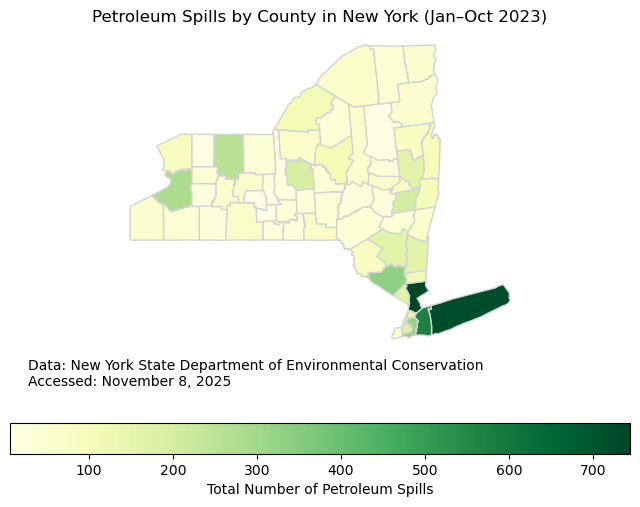

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_axis_off()

# Choropleth map of petroleum spills by county
ny_counties.plot(ax=ax,
                 column='n_spills', 
                 cmap='YlGn', 
                 legend=True, 
                 legend_kwds={'label': "Total Number of Petroleum Spills",
                              'orientation': "horizontal"},
                 edgecolor = "lightgrey",
                 linewidth = 1,
                 figsize=(10, 6))


ax.set_title("Petroleum Spills by County in New York (Jan–Oct 2023)") # Add Title
# Add annotation containing data source and data eof access
ax.annotate("Data: New York State Department of Environmental Conservation\nAccessed: November 8, 2025",
            xy=(-0.2, -0.1), 
            xycoords='axes fraction')

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

### Data Loading
The spill incidence and TIGER US Counties shape file where loaded in . 

### Data Cleaning & Filtering: 
Column names where changed to snake case. The spill data was filtered to only have contain oil spills that started bewtween Jan 1, 2023 to Oct 31, 2023. The number of spills in each county was then counted by calling value_counts() on the county column.

### Geospatial Alignment:
The counties dataset was filtered to only contain New York counties. A missmatch in the county names was then corrected. The dataframes were then inner joined on the county column. After that one observation was added to Niagara for the Tuscarora Indian Reservation.

### Visualization
A choropleth map was made showing the number of spills in each county.

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [35]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/op